In [ ]:
!mkdir coco
!cd coco
!mkdir images
!cd images

#!wget http://images.cocodataset.org/zips/train2017.zip
#!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/zips/test2017.zip
#!wget http://images.cocodataset.org/zips/unlabeled2017.zip

#!unzip train2017.zip
#!unzip val2017.zip
!unzip test2017.zip
#!unzip unlabeled2017.zip

#!rm train2017.zip
#!rm val2017.zip
!rm test2017.zip
#!rm unlabeled2017.zip 

!cd ../
#!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
#!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
!wget http://images.cocodataset.org/annotations/image_info_test2017.zip
#!wget http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip

#!unzip annotations_trainval2017.zip
#!unzip stuff_annotations_trainval2017.zip
!unzip image_info_test2017.zip
#!unzip image_info_unlabeled2017.zip

#!rm annotations_trainval2017.zip
#!rm stuff_annotations_trainval2017.zip
!rm image_info_test2017.zip
#!rm image_info_unlabeled2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000395525.jpg  
 extracting: test2017/000000235435.jpg  
 extracting: test2017/000000069964.jpg  
 extracting: test2017/000000131962.jpg  
 extracting: test2017/000000281392.jpg  
 extracting: test2017/000000534893.jpg  
 extracting: test2017/000000128676.jpg  
 extracting: test2017/000000187639.jpg  
 extracting: test2017/000000153095.jpg  
 extracting: test2017/000000151361.jpg  
 extracting: test2017/000000067484.jpg  
 extracting: test2017/000000358618.jpg  
 extracting: test2017/000000236877.jpg  
 extracting: test2017/000000151014.jpg  
 extracting: test2017/000000351896.jpg  
 extracting: test2017/000000320687.jpg  
 extracting: test2017/000000396067.jpg  
 extracting: test2017/000000318429.jpg  
 extracting: test2017/000000381787.jpg  
 extracting: test2017/000000287482.jpg  
 extracting: test2017/000000459614.jpg  
 extracting: test2017/000000010879.jpg  
 extracting: test2017/000000044270.jpg  
 extra

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
import os
from PIL import Image
dataDir='/content/test2017/'
testDir = '/content/testDataset/'
for image in os.listdir(dataDir):
  img = Image.open(dataDir+image).convert('RGB')
  img_resized = img.resize((256, 256))
  img_resized.save(testDir+image)

In [ ]:
print(len(os.listdir(testDir)))
import cv2
img = cv2.imread('/content/testDataset/000000000080.jpg')
print(img.shape)

40670
(256, 256, 3)


In [ ]:
dataDir='/content/test2017'
dataType='test2017'
annFile='/content/annotations/image_info_test-dev2017.json'.format(dataDir,dataType)


coco=COCO(annFile)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
furniture outdoor indoor electronic vehicle appliance animal sports food accessory person kitchen


In [ ]:
catIds = coco.getCatIds(catNms=['tv']);
imgIds = coco.getImgIds(catIds=catIds);
#imgIds = coco.getImgIds(imgIds = [324158])
print(imgIds)
print(len(imgIds))
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[]
0


ValueError: ignored

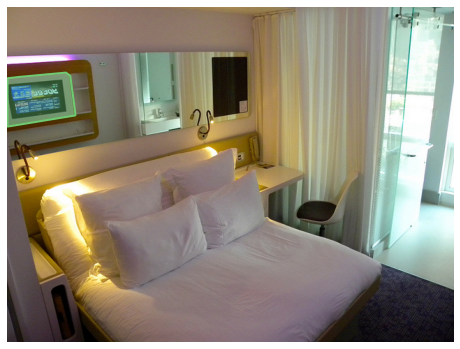

In [ ]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


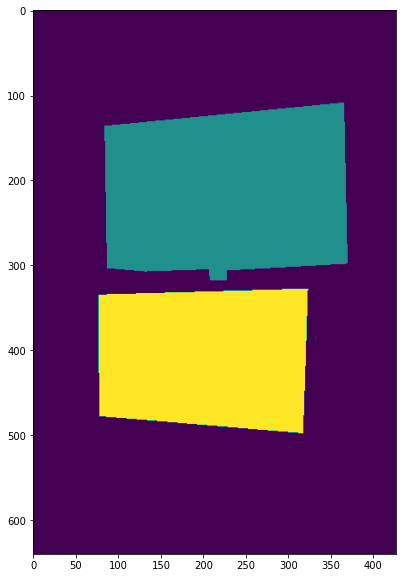

In [ ]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)
print(mask)

(480, 640, 3)
[288. 288.]


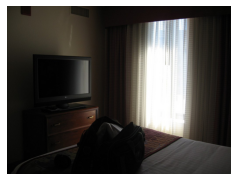

In [ ]:
catIds = coco.getCatIds(catNms=['tv']);
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
for i in range(len(imgIds)):
  if i==1000:
    img = coco.loadImgs(imgIds[i])[0]
    I = io.imread(img['coco_url'])
    print(I.shape)
    fig = plt.figure(figsize=(4,4))
    size = fig.get_size_inches()*fig.dpi
    print(size)
    plt.axis('off')
    plt.imshow(I)
    #fig.savefig('FIG {0}.jpg'.format(i))
    fig.show()
    
  else:
    pass

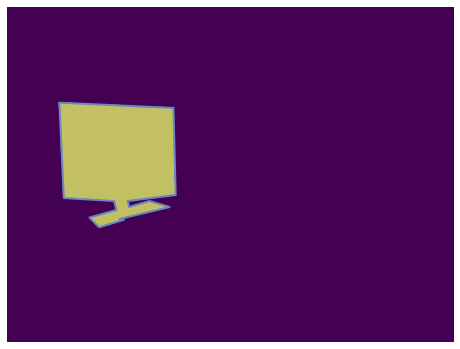

<Figure size 288x288 with 0 Axes>

In [ ]:

plt.imshow(I); plt.axis('off')
#fig = plt.figure(figsize=(4,4))
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)


mask = coco.annToMask(anns[0])
for i in range(len(anns)):
  mask += coco.annToMask(anns[i])

plt.imshow(mask)
fig = plt.figure(figsize=(4,4))
size = fig.get_size_inches()*fig.dpi
plt.savefig('FIG m.jpg')
    #print(size)
    #print(mask)
